In [1]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
import logging

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.10.0


In [2]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [3]:
import numpy as np

data_x = np.load('x_train.npy')

In [4]:
data_x

array([[[ 1.7597e+01,  8.1713e+00, -1.7842e+00, -1.9706e+01,
         -9.7135e+00, -6.1887e+01],
        [ 2.2974e-01, -5.8956e+00,  1.6837e+01,  5.0390e+00,
          2.4332e+00,  5.8914e+01],
        [-2.9654e+01, -2.1296e+01,  2.9103e+01, -4.7503e-01,
          7.5391e+01,  1.0665e+01],
        ...,
        [ 1.1982e+02,  2.1849e+02,  1.6398e+03,  5.9787e+02,
          2.1922e+03,  1.8484e+01],
        [ 9.1591e+01,  1.0378e+02,  1.8238e+03,  1.2460e+03,
          1.1301e+04,  7.5107e+02],
        [ 4.3719e+01,  3.0689e+01,  9.5092e+02,  8.5927e+02,
          8.1331e+03,  9.8883e+02]],

       [[ 2.4209e+00, -5.6039e-01,  2.3654e+01, -3.8171e+00,
          1.3721e+00,  8.2510e+00],
        [ 1.6847e+00,  2.3989e+01,  1.7803e+01, -1.9575e+01,
         -8.2534e+00, -2.3959e+01],
        [ 5.0692e-01,  5.0281e+01,  5.1196e+01,  1.6036e+01,
          7.2974e-01, -1.8185e+01],
        ...,
        [-1.5618e+01, -7.4233e+00,  3.7833e+00,  1.6565e+00,
         -1.0438e+01, -5.5229e+00],
  

In [5]:
# Map activities to integers
label_mapping = {
    "Wish":0,
    "Another":1,
    "Comfortably":2,
    "Money":3,
    "Breathe":4,
    "Time":5,
    "Brain":6,
    "Echoes":7,
    "Wearing":8,
    "Sorrow":9,
    "Hey":10,
    "Shine":11,
}


In [6]:
#questa è la time series, 2429 oggetti misurati 36 volte ciascuno su 6 attributi
print(data_x.shape)

(2429, 36, 6)


In [7]:
import numpy as np

data_y = np.load('y_train.npy')
print(data_y)

[ 0  0  0 ... 11 11 11]


In [8]:
#questa è l'associazione di ogni time serie alla classe
print(data_y.shape)
print(data_y)

(2429,)
[ 0  0  0 ... 11 11 11]


In [10]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [58]:
#NORMALIZZAZIONE A MEDIA E VARIANZA NON ESEGUITA

import torch
  
# Step 2: creating a torch tensor
t = torch.tensor(data_x)
print("Tensor before Normalize:\n", t)
  
# Step 3: Computing the mean, std and variance
mean, std, var = torch.mean(t), torch.std(t), torch.var(t)
print("Mean, Std and Var before Normalize:\n", 
      mean, std, var)
  
# Step 4: Normalizing the tensor
t  = (t-mean)/std
print("Tensor after Normalize:\n", t)
  
# Step 5: Again compute the mean, std and variance
# after Normalize
mean, std, var = torch.mean(t), torch.std(t), torch.var(t)
print("Mean, std and Var after normalize:\n", 
      mean, std, var)

Tensor before Normalize:
 tensor([[[ 1.7597e+01,  8.1713e+00, -1.7842e+00, -1.9706e+01, -9.7135e+00,
          -6.1887e+01],
         [ 2.2974e-01, -5.8956e+00,  1.6837e+01,  5.0390e+00,  2.4332e+00,
           5.8914e+01],
         [-2.9654e+01, -2.1296e+01,  2.9103e+01, -4.7503e-01,  7.5391e+01,
           1.0665e+01],
         ...,
         [ 1.1982e+02,  2.1849e+02,  1.6398e+03,  5.9787e+02,  2.1922e+03,
           1.8484e+01],
         [ 9.1591e+01,  1.0378e+02,  1.8238e+03,  1.2460e+03,  1.1301e+04,
           7.5107e+02],
         [ 4.3719e+01,  3.0689e+01,  9.5092e+02,  8.5927e+02,  8.1331e+03,
           9.8883e+02]],

        [[ 2.4209e+00, -5.6039e-01,  2.3654e+01, -3.8171e+00,  1.3721e+00,
           8.2510e+00],
         [ 1.6847e+00,  2.3989e+01,  1.7803e+01, -1.9575e+01, -8.2534e+00,
          -2.3959e+01],
         [ 5.0692e-01,  5.0281e+01,  5.1196e+01,  1.6036e+01,  7.2974e-01,
          -1.8185e+01],
         ...,
         [-1.5618e+01, -7.4233e+00,  3.7833e+00,  1.6

In [59]:
t = np.array(t)

In [9]:
from sklearn.model_selection import train_test_split
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(X_train.shape, X_val.shape, X_test.shape)

(1821, 36, 6) (364, 36, 6) (244, 36, 6)


In [10]:
Y_train = tfk.utils.to_categorical(y_train)
Y_val = tfk.utils.to_categorical(y_val)
Y_test = tfk.utils.to_categorical(y_test)


input_shape = X_train.shape[1:]
X_train.shape, Y_train.shape,X_val.shape,Y_val.shape, X_test.shape, Y_test.shape , input_shape

((1821, 36, 6),
 (1821, 12),
 (364, 36, 6),
 (364, 12),
 (244, 36, 6),
 (244, 12),
 (36, 6))

[ 0  1  2  3  4  5  6  7  8  9 10 11]


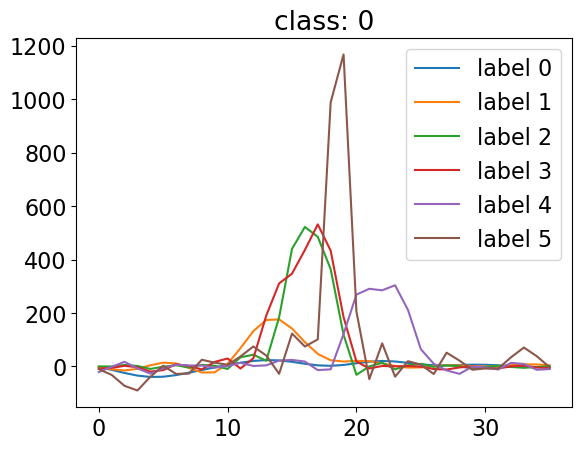

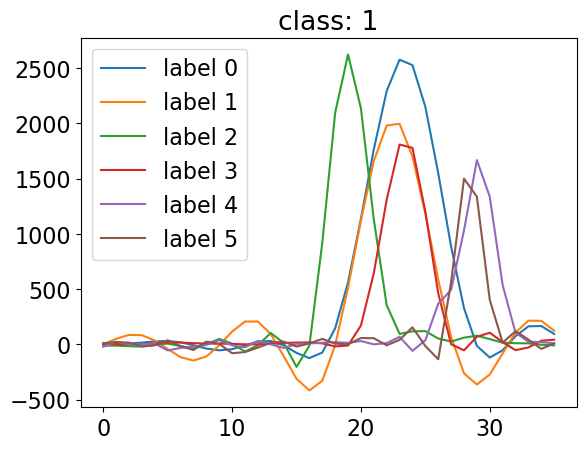

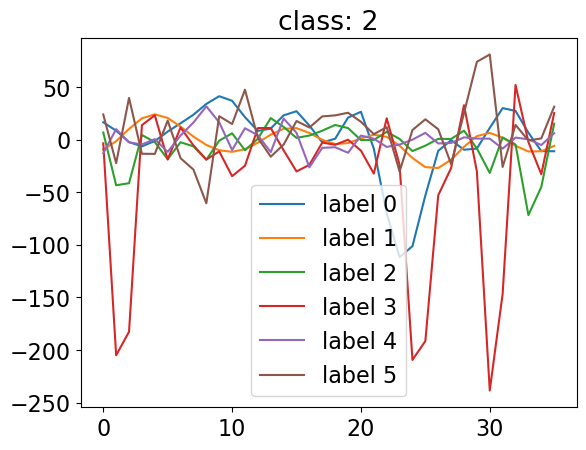

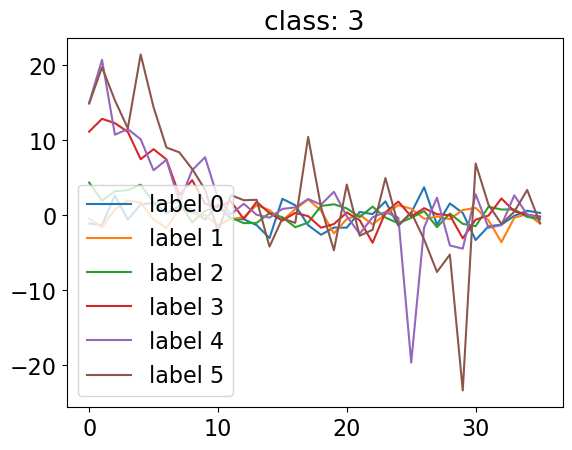

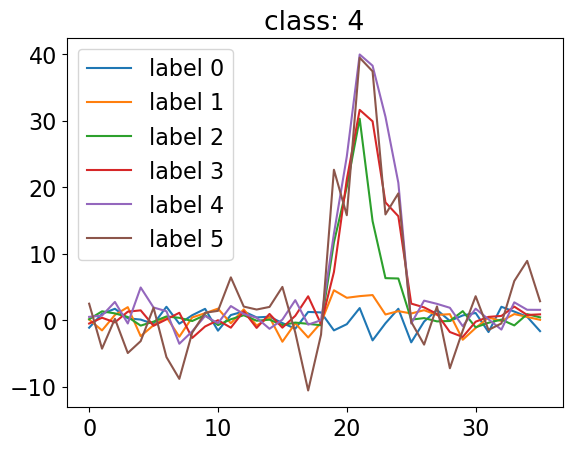

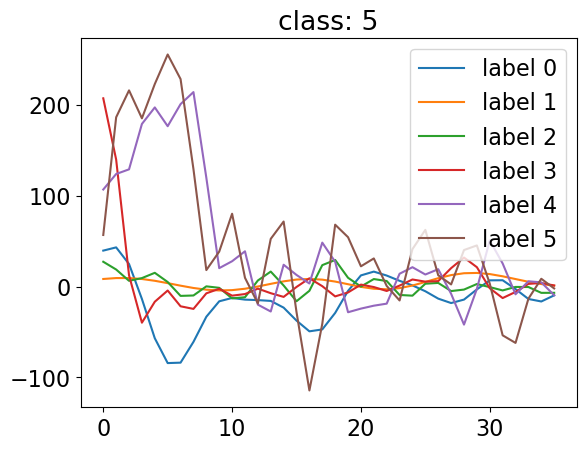

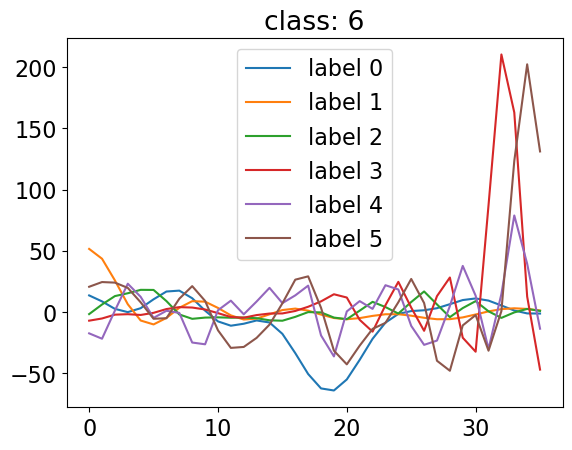

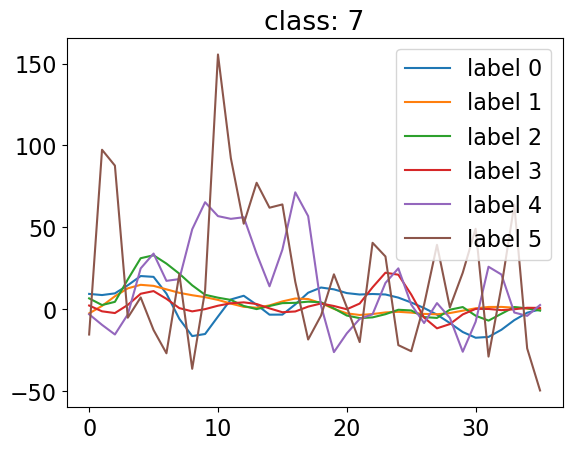

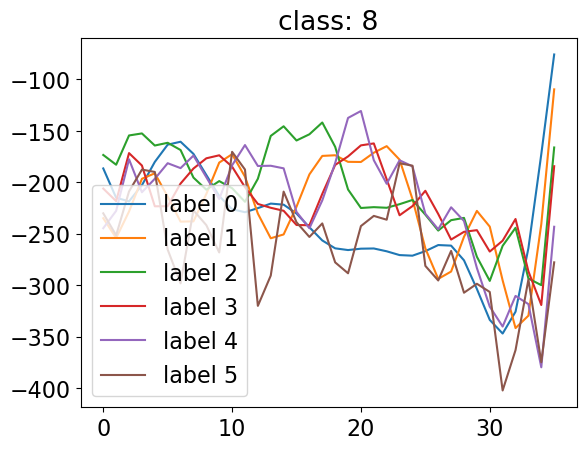

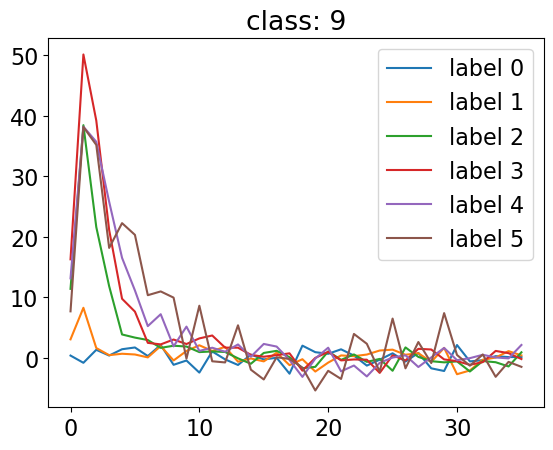

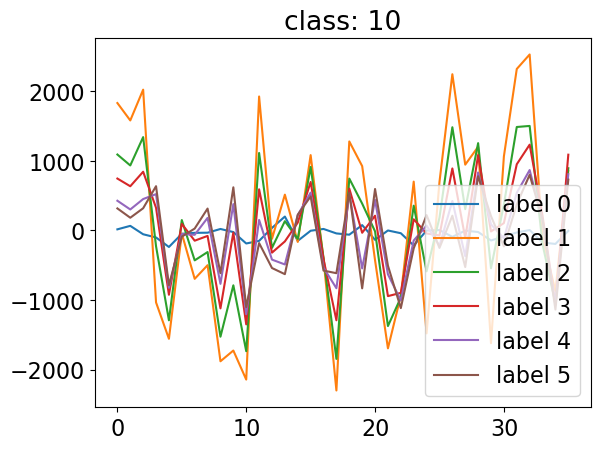

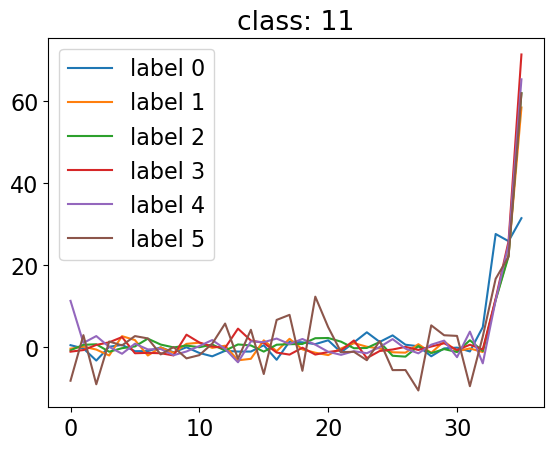

In [74]:
classes = np.unique(data_y, axis=0)
print(classes)
for c in classes:
    plt.figure()
    plt.title("class: " + str(c)) 
    c_x_train = X_train[y_train == c]
    for i in range(0,6):
        #print(c_x_train[0].shape)
        plt.plot(c_x_train[0,:,i], label="label " + str(i))
    plt.legend(loc="best")
    plt.show()
    #plt.clos

In [11]:
def build_sequences(X,Y, window, stride):
    
    # Sanity check to avoid runtime errors
    assert window % stride == 0
    dataset = []
    labels = []
    for i in range(0,X.shape[0]):
    # Build features windows with their corresponging labels
        idx = 0
        while idx+window <= X.shape[1]:
            dataset.append(X[i,idx:idx+window])
            labels.append(Y[i])
            idx += stride
    dataset = np.array(dataset)
    labels = np.array(labels)
    return dataset, labels


In [12]:
X_train_seq,Y_train_seq=build_sequences(X_train,Y_train,18,3)
print(X_train_seq.shape)
print(Y_train_seq.shape)

X_val_seq,Y_val_seq=build_sequences(X_val,Y_val,18,1)
print(X_val_seq.shape)
print(Y_val_seq.shape)

X_test_seq,Y_test_seq=build_sequences(X_test,Y_test,18,1)
print(X_test_seq.shape)
print(Y_test_seq.shape)

(12747, 18, 6)
(12747, 12)
(6916, 18, 6)
(6916, 12)
(4636, 18, 6)
(4636, 12)


In [13]:
input_shape = X_train_seq.shape[1:]
print(X_train_seq.shape[1:])
classes = Y_train_seq.shape[-1]
print(classes)
batch_size = 32
epochs = 50

(18, 6)
12


In [14]:
def build_model(input_shape, classes, pre_model=None):
    input_layer = tfk.layers.Input(input_shape)
    
    conv1 = tfk.layers.Conv1D(filters=128, kernel_size=8, padding='same')(input_layer)
    conv1 = tfk.layers.BatchNormalization()(conv1)
    conv1 = tfk.layers.Dense(128, activation='relu')(conv1)
    
    conv2 = tfk.layers.Conv1D(filters=128, kernel_size=5, padding='same')(conv1)
    conv2 = tfk.layers.BatchNormalization()(conv2)
    conv2 = tfk.layers.Dense(128, 'relu')(conv2)

    conv3 = tfk.layers.Conv1D(128, kernel_size=5,padding='same')(conv2)
    conv3 = tfk.layers.BatchNormalization()(conv3)
    conv3 = tfk.layers.Dense(128,'relu')(conv3)
    
    conv4 = tfk.layers.Conv1D(filters=256, kernel_size=8, padding='same')(conv3)
    conv4 = tfk.layers.BatchNormalization()(conv4)
    conv4 = tfk.layers.Dense(256, 'relu')(conv4)
    
    conv5 = tfk.layers.Conv1D(filters=256, kernel_size=8, padding='same')(conv4)
    conv5 = tfk.layers.BatchNormalization()(conv5)
    conv5 = tfk.layers.Dense(256, 'relu')(conv5)
    
    gap_layer = tfk.layers.GlobalAveragePooling1D()(conv5)
    
    dropout = tfkl.Dropout(.1, seed=seed)(gap_layer)
    
    
    output_layer = tfk.layers.Dense(classes, activation='softmax')(gap_layer)

    model = tfk.models.Model(inputs=input_layer, outputs=output_layer)
    if pre_model is not None:
            for i in range(len(model.layers)-1):
                model.layers[i].set_weights(pre_model.layers[i].get_weights())


    model.compile(loss='categorical_crossentropy', optimizer = tfk.optimizers.Adam(),
        metrics=['accuracy'])

    return model

In [16]:
# Encoder Summary Example
model = build_model(input_shape, classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 18, 6)]           0         
                                                                 
 conv1d (Conv1D)             (None, 18, 128)           6272      
                                                                 
 batch_normalization (BatchN  (None, 18, 128)          512       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 18, 128)           16512     
                                                                 
 conv1d_1 (Conv1D)           (None, 18, 128)           82048     
                                                                 
 batch_normalization_1 (Batc  (None, 18, 128)          512       
 hNormalization)                                             

In [17]:
# Train the model
history = model.fit(
    x = X_train_seq,
    y = Y_train_seq,
    batch_size = batch_size,
    epochs = epochs,
    validation_data=(X_val_seq,Y_val_seq),
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=30, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/50
399/399 [==============================] - 21s 48ms/step - loss: 1.7426 - accuracy: 0.4132 - val_loss: 2.0248 - val_accuracy: 0.3836 - lr: 0.0010
Epoch 2/50
399/399 [==============================] - 19s 47ms/step - loss: 1.5202 - accuracy: 0.4771 - val_loss: 1.6844 - val_accuracy: 0.4462 - lr: 0.0010
Epoch 3/50
399/399 [==============================] - 19s 48ms/step - loss: 1.4089 - accuracy: 0.5115 - val_loss: 2.4819 - val_accuracy: 0.2646 - lr: 0.0010
Epoch 4/50
399/399 [==============================] - 19s 47ms/step - loss: 1.3452 - accuracy: 0.5385 - val_loss: 1.8108 - val_accuracy: 0.4735 - lr: 0.0010
Epoch 5/50
399/399 [==============================] - 19s 48ms/step - loss: 1.2946 - accuracy: 0.5582 - val_loss: 1.8780 - val_accuracy: 0.4740 - lr: 0.0010
Epoch 6/50
399/399 [==============================] - 19s 46ms/step - loss: 1.2652 - accuracy: 0.5655 - val_loss: 4.0089 - val_accuracy: 0.2591 - lr: 0.0010
Epoch 7/50
399/399 [==============================] - 18s 

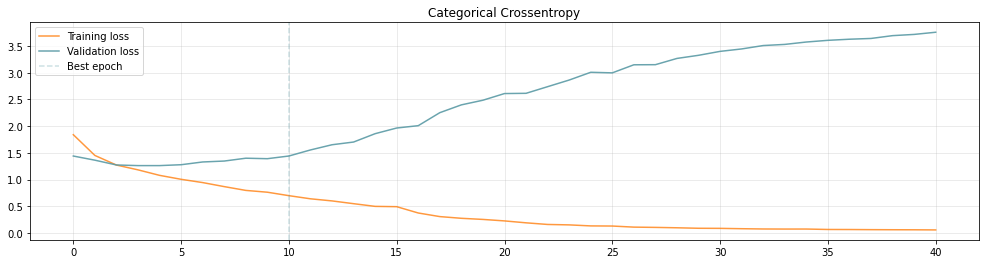

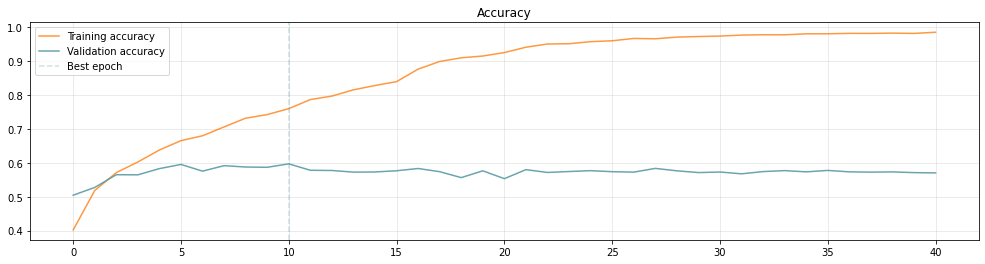

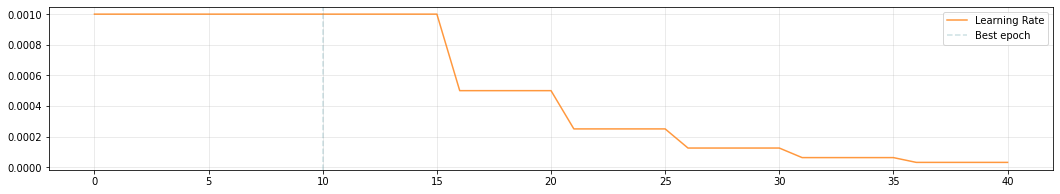

In [24]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [15]:
model.save('LSTM_1.0')

INFO:tensorflow:Assets written to: Handmade_10\assets


INFO:tensorflow:Assets written to: Handmade_10\assets


In [25]:
predictions = model.predict(X_test_seq)
predictions.shape

130/130 [==============================] - 1s 3ms/step


(4148, 12)

Accuracy: 0.6049
Precision: 0.4996
Recall: 0.4479
F1: 0.4521


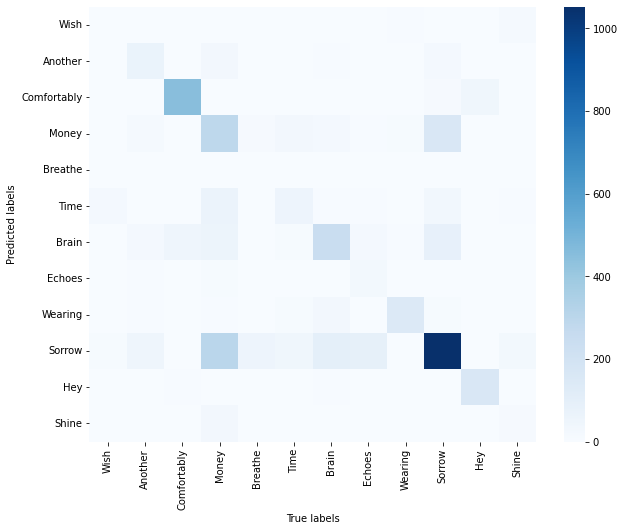

In [34]:
# Compute the confusion matrix
cm = confusion_matrix(np.argmax(Y_test_seq, axis=-1), np.argmax(predictions, axis=-1))

# Compute the classification metrics
accuracy = accuracy_score(np.argmax(Y_test_seq, axis=-1), np.argmax(predictions, axis=-1))
precision = precision_score(np.argmax(Y_test_seq, axis=-1), np.argmax(predictions, axis=-1), average='macro')
recall = recall_score(np.argmax(Y_test_seq, axis=-1), np.argmax(predictions, axis=-1), average='macro')
f1 = f1_score(np.argmax(Y_test_seq, axis=-1), np.argmax(predictions, axis=-1), average='macro')
print('Accuracy:',accuracy.round(4))
print('Precision:',precision.round(4))
print('Recall:',recall.round(4))
print('F1:',f1.round(4))

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm.T, cmap='Blues', xticklabels=list(label_mapping.keys()), yticklabels=list(label_mapping.keys()))
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()